# Régression linéaire pour prédiction immobilière en python vanilla

### Librairies

In [33]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

### Création d'un dataset aléatoire grâce a sklearn

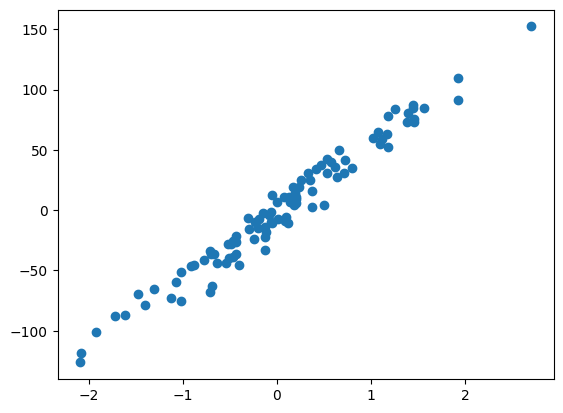

In [34]:
x, y = make_regression(n_samples= 100, n_features=1, noise= 10)
plt.scatter(x, y)

### Reshape la matrice de manière à pouvoir effectuer des calculs mathématiques par la suite

In [35]:
print(x.shape)
# Initialement, y est en (100,) - on le redimentionne en (100, 1).
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


### Création de la matrice contenant les m²

In [43]:
# Matrice X des features, on rajoute les 1 pour faire des produits matriciels sans changer les résultats
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

### Création de la matrice coef, elle servira à ajuster le model

In [46]:
# Initialisation des coéfs en aléatoire
theta = np.random.randn(2, 1)
theta

array([[-0.69856748],
       [ 0.06575695]])

### Création du model qui retourne le produit matriciel de théta et X

In [47]:
# Model
def model(X, theta):
    return X @ theta

### Le résultat représente des données aléatoires pour le moment

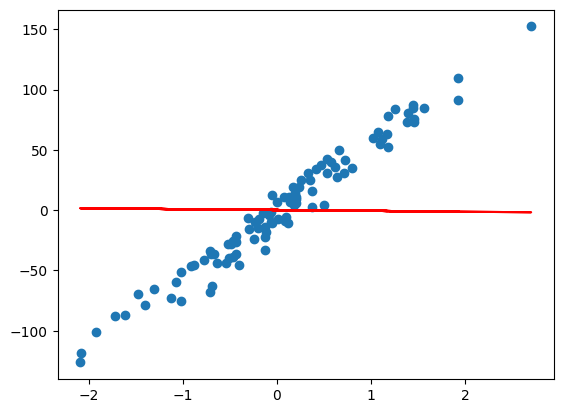

In [48]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

### Fonction coût

In [58]:
# Elle sert à quantifier la différence des données prédites et la valeur réelle
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
cost_function(X, y, theta)

np.float64(1364.4054422249917)

### Calcul du gradient

In [59]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T @ (model(X, theta) - y)

### Descente linéaire de gradient

In [60]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Machine Learning !

In [53]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

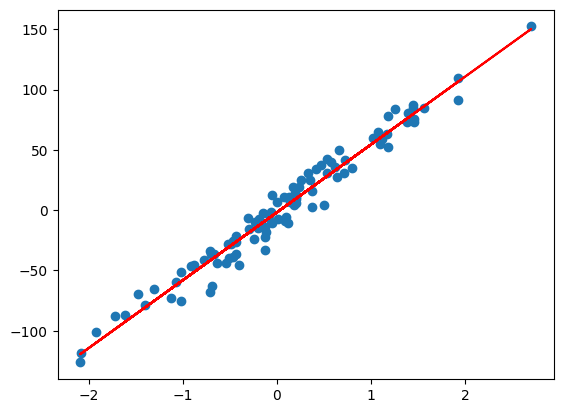

In [54]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

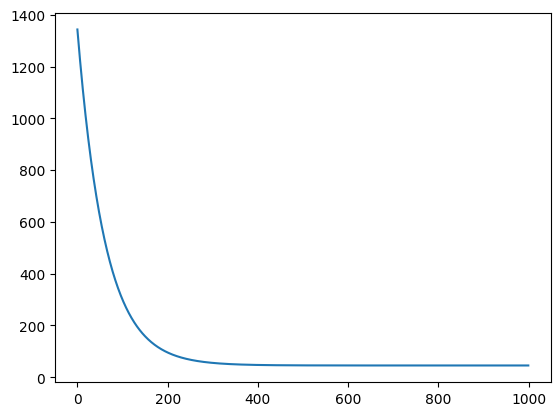

In [55]:
plt.plot(range(1000), cost_history)

### Le coef de détermination sert à évaluer la performance de l'algorithme

In [56]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [57]:
coef_determination(y, predictions)

np.float64(0.9657543241853848)